**ANALYSIS OF HONEY PRODUCTION FROM 1998-2012**

In [2]:
#Khushi Khokhar's Minor Project Submission 
#Dataset used :: Honey Production

In [1]:
#import the required packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Reading the dataset
honeyprod = pd.read_csv(r'honeyproduction.csv')

In [4]:
#Viewing the first few rows of the dataset
honeyprod.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


**A) EXPLORING QUANTITATIVE VARIABLES**

In [5]:
#The shape of the dataset
honeyprod.shape

(626, 8)

 Observation: We have 626 observations and 8 columns

In [6]:
#Check the datatype of the variables to make sure they are read properly
honeyprod.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

Observations:
1. State is of type object.
2. Year is of type integer currently. Since year is a categorical variable here, convert it to category data type in Python.
3. All the other variables are numerical  data types (float64 and int64).


In [7]:
# Convert year into categories
honeyprod.year = honeyprod.year.astype('category')

**B) EXPLORING QUALITATIVE VARIABLES**

In [8]:
honeyprod.describe()


,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


Observations:
1. Number of colonies in every state are spread
over a huge range. Ranging from 2000 to 510000.
2. The mean numcol is close to the 50% percentile of the data, indicating a right skew.
3. As expected, standard deviation of numcol is very high
4. yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
5. As all the variables have a huge range, we will be investigating further to check wether this spread is mainly across different states or varies in the same state over the years.

**C) LOOKING AT THE RELATIONSHIP BETWEEN NUMERICAL VARIABLES USING PAIR PLOT AND CORRELATION PLOTS.**


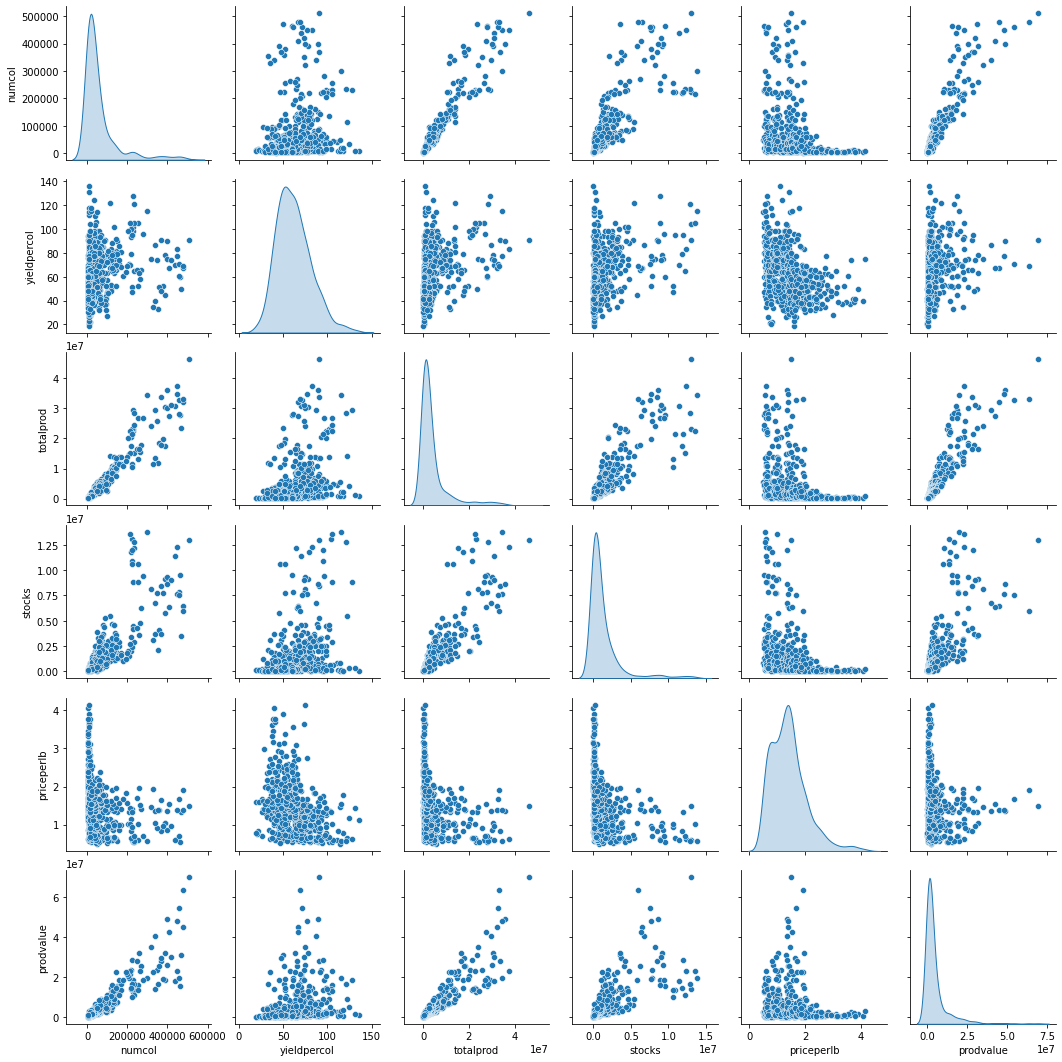

In [9]:
#Creating pairplot using seaborn
sns.pairplot(honeyprod, diag_kind="kde")


In [10]:
#Creating 2Dimensional correlation plot
correlation = honeyprod.corr() 
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


In [11]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

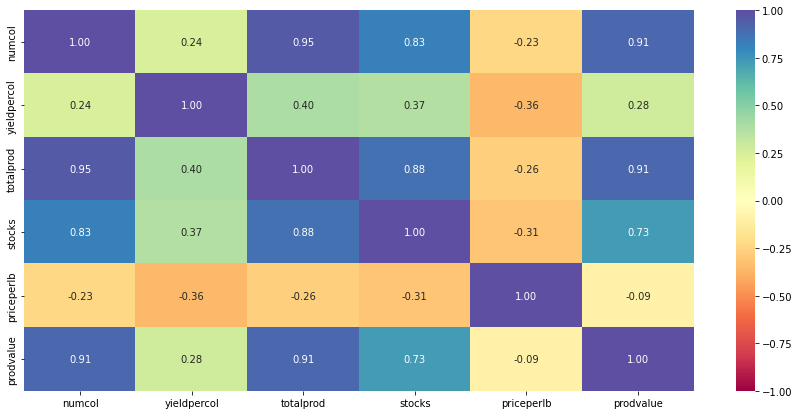

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:
As expected, all these values are highly correlated with each other. 
1. Number of colonies have a high positive correlation with total production, stocks and the value of production.
2. Yield per colony does not have a high correlation with any of the features that we have in our dataset.Same is the case with priceperlb.
3. Determining the factors influencing per colony yield and price per pound of honey will need furthur investigation.


In [13]:
#Printing the categorical features - state and year
print(honeyprod.state.nunique())
print(honeyprod.year.nunique())


44
15


Observation: We have honey production data for 44 US states out of 49 over a span of 15 years, from 1998 to 2012.

**D) LOOKING AT THE OVERALL TREND OF HONEY PRODUCTION IN THE USA OVER YEARS**

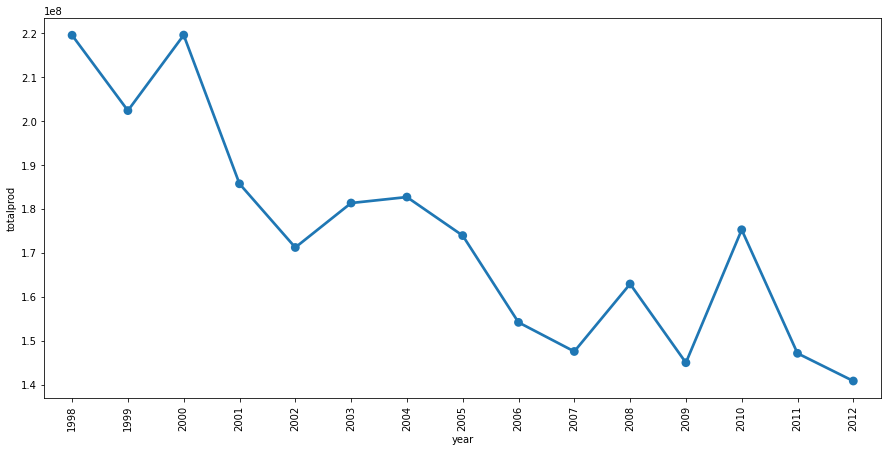

In [14]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labels
plt.show()


In [15]:
honeyprod.groupby(['year'])['totalprod'].sum().reset_index()

,year,totalprod
0,1998,219519000.0
1,1999,202387000.0
2,2000,219558000.0
3,2001,185748000.0
4,2002,171265000.0
5,2003,181372000.0
6,2004,182729000.0
7,2005,173969000.0
8,2006,154238000.0
9,2007,147621000.0


Observations:

1. The overall honey production in the USA has been decresing over the years.
2. Total honey production = (number of colonies) * (average yield per colony)

Let us check if the honey production is decreasing due to one or both of these factors.

**E) VARIATION IN THE NUMBER OF COLONIES OVER THE YEARS**

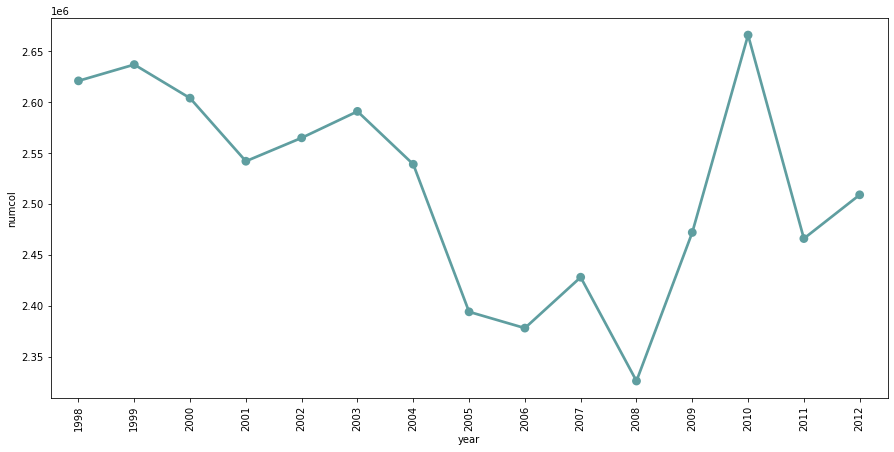

In [16]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum, color='cadetblue')
plt.xticks(rotation=90) # To rotate the x axis labels
plt.show()


Observations:
1. The number of colonies across the country show a declining trend from 1998-2008 but, has seen an uptick since 2008.
2. It is possible that there was some intervension in 2008 that helped increasing the number of honey bee colonies across the country.

**F) ANALYSING THE VARIATION OF YIELD PER COLONY OVER THE YEARS AND PRODUCTION TREND AT STATE LEVEL**

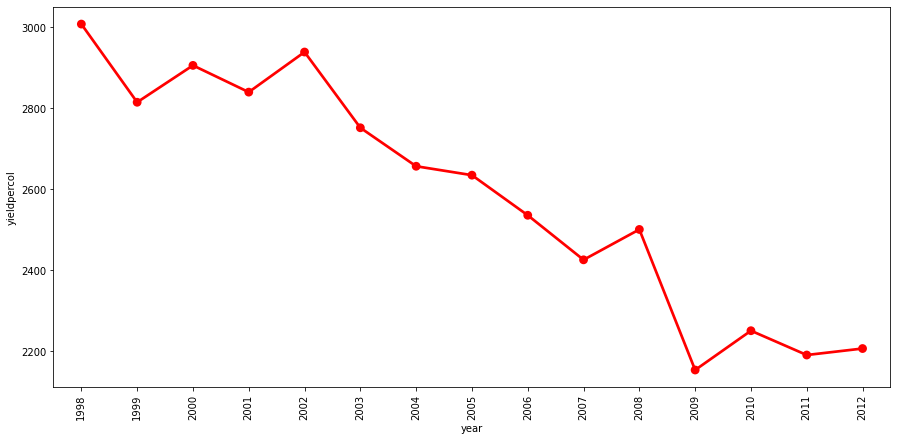

In [17]:
#Plotting the yield per colony over the years
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None, color='red')
plt.xticks(rotation=90) # To rotate the x axis labels
plt.show()

Observation:
1. In contrast to number of colonies, the yield per colony has been decreasing since 1998.
2. This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but it is the the yield per colony.


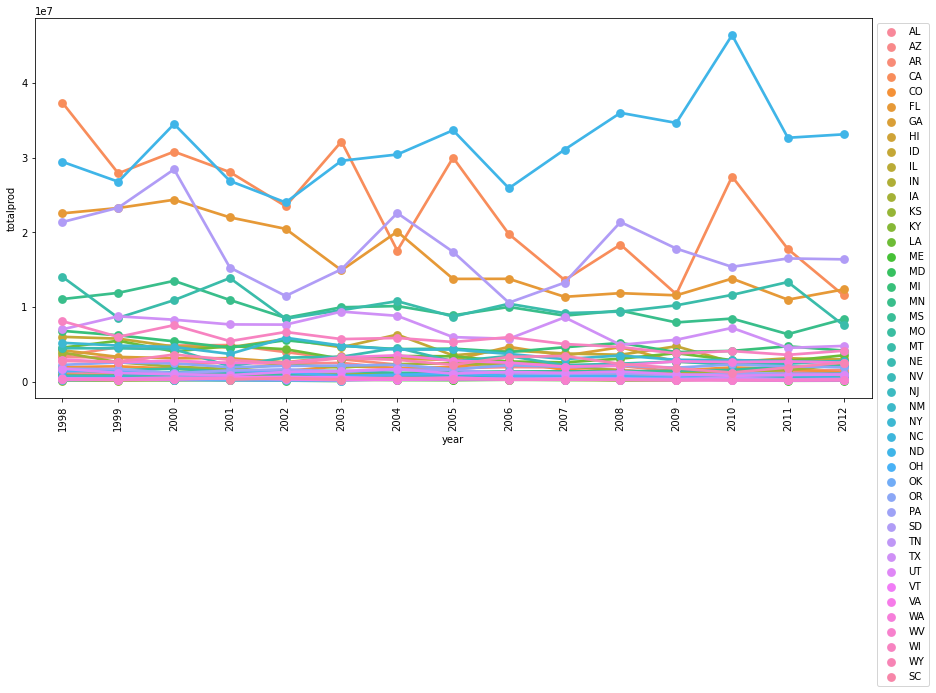

In [18]:
#Plotting the Production Trend
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize=(15, 7)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labels
plt.show()

Observation: There are some states that have much higher production than the others but this plot is hard to read. Let us plot each state seperatly for a better understanding.

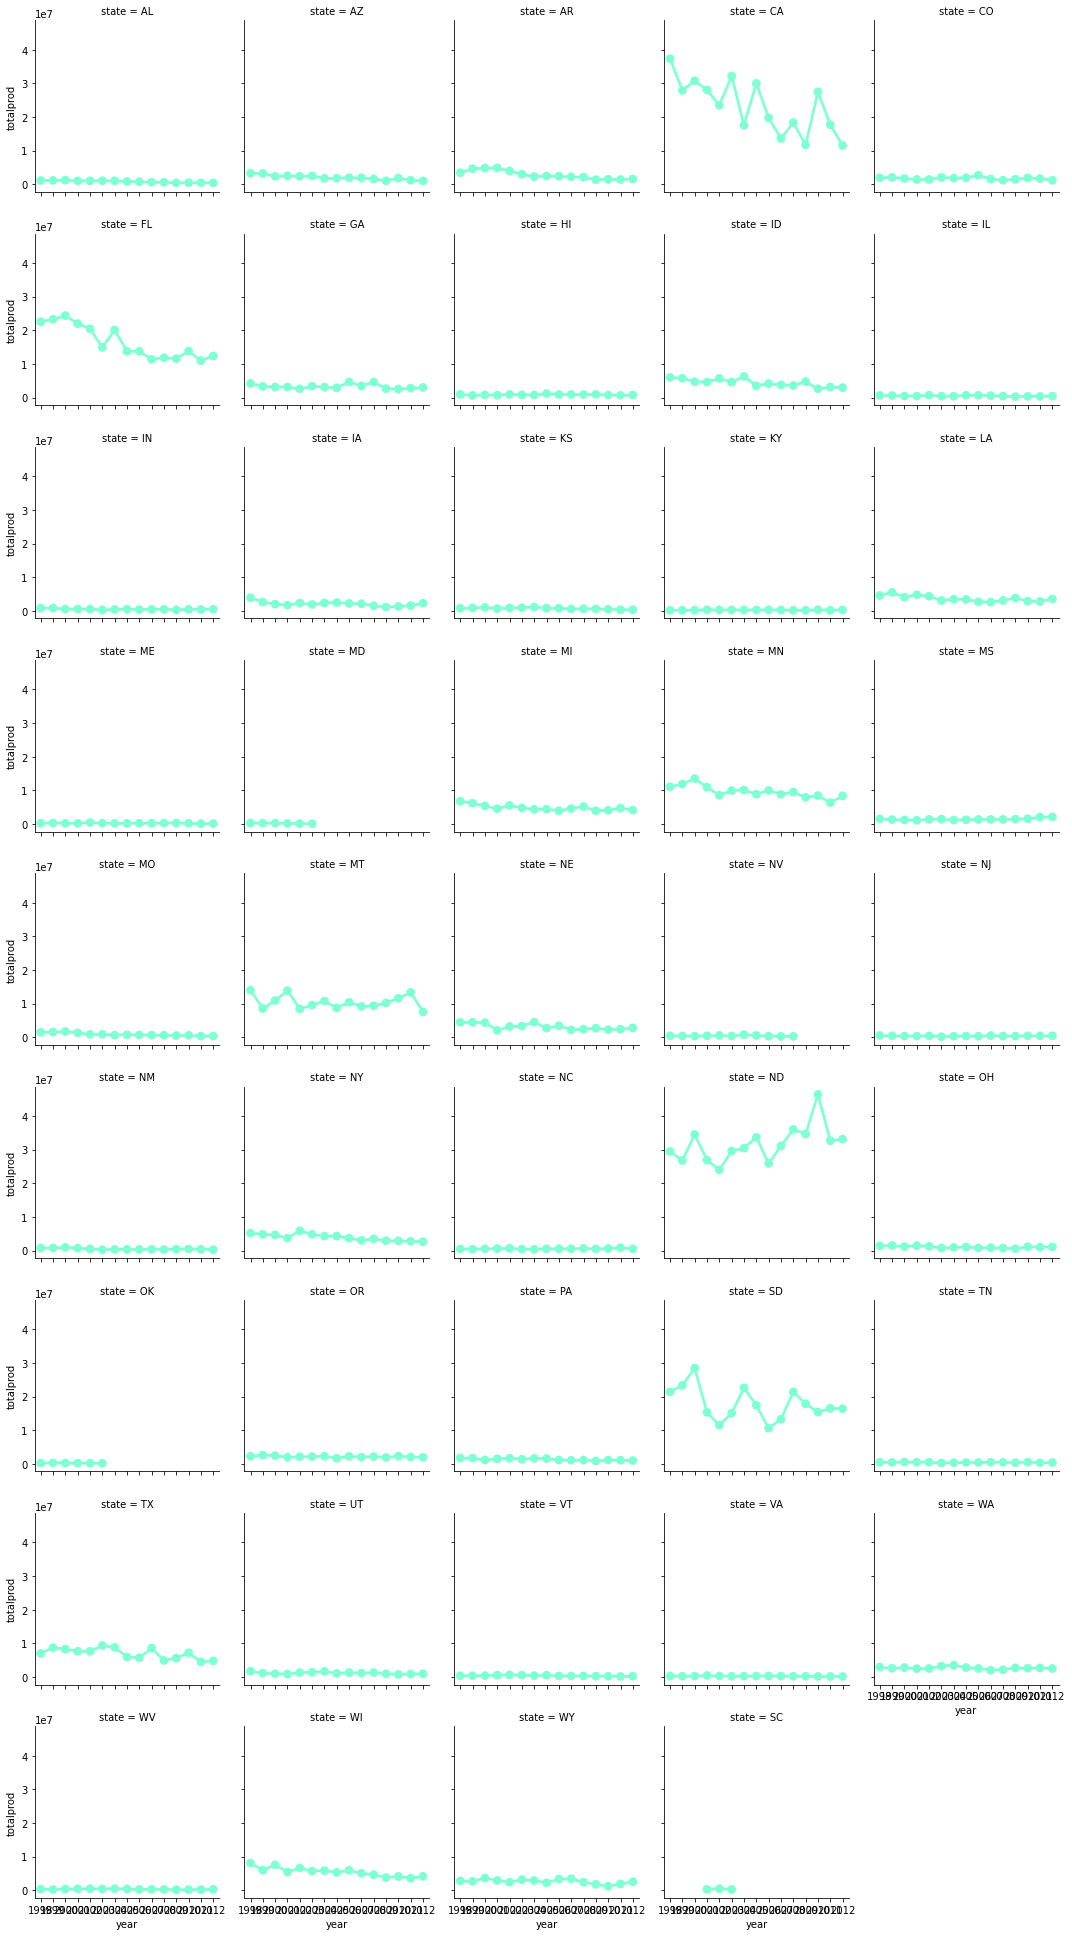

In [19]:
#Plotting the Catplot
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5, color='aquamarine')
plt.show()


Observations:
1. The most prominent honey producing states of the USA are - California, Florida, North and South Dakota and Montana.
2. Unfortunately, the honey production in California has seen a steep decline over the years.
3. Florida's total production also seen a decline.
4. South Dakota has maintained its levels of production.
5. North Dakota has seen an impressive increase in the production.

**G) ANALYSING WHAT EFFECT THE DECLINING PRODUCTION TREND HAS HAD ON THE VALUE OF PRODUCTION**

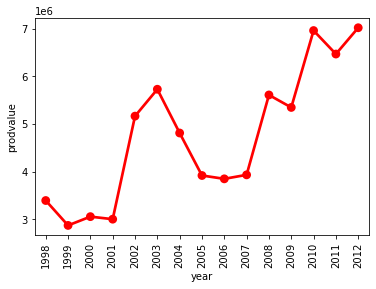

In [20]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None, color='red')
plt.xticks(rotation=90) # To rotate the x axis labels
plt.show()


Observations:
1. As the total production has declined over the years, the value of production per pound has increased over time.
2. As the supply declined, the demand has added to the value of honey.

**H) PATTERNS OBSERVED BETWEEN TOTAL HONEY PRODUCTION AND VALUE OF PRODUCTION EVERY YEAR. HOW HAS THE VALUE OF PRODUCTION ,WHICH COULD BE TIED TO DEMAND, CHANGED EVERY YEAR?**

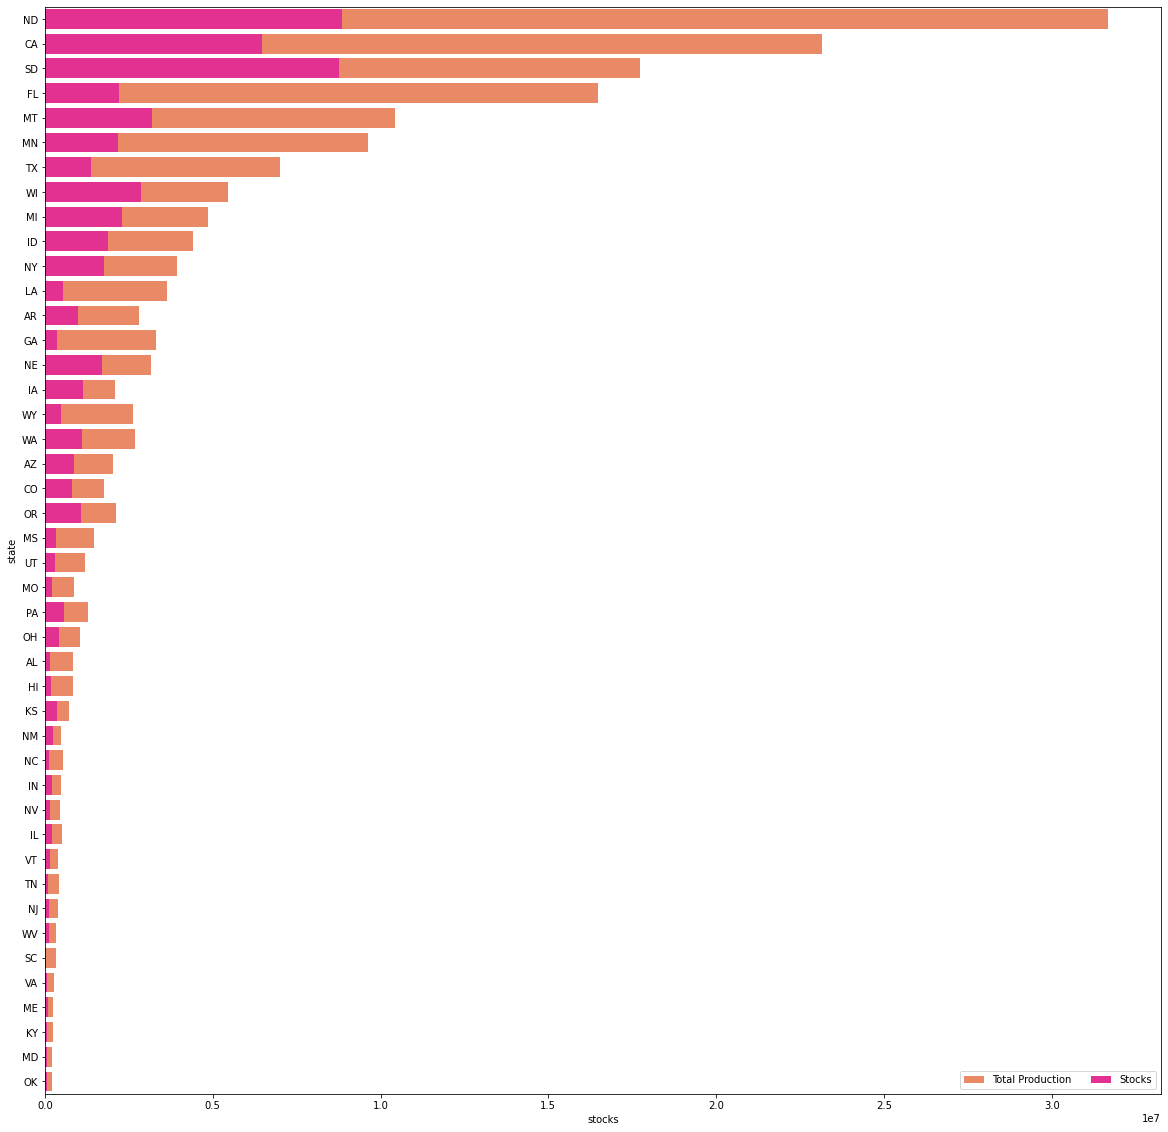

In [21]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="coral", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="deeppink", ci=None)

# Add a legend  
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()


Observations:
1. North Dakota was able to sell more honey than South Dakota, despite having the highest production value.
2. Florida has the highest efficiency among the major honey producing states.
3. Michigan is more efficient than Wisconsin in selling honey.


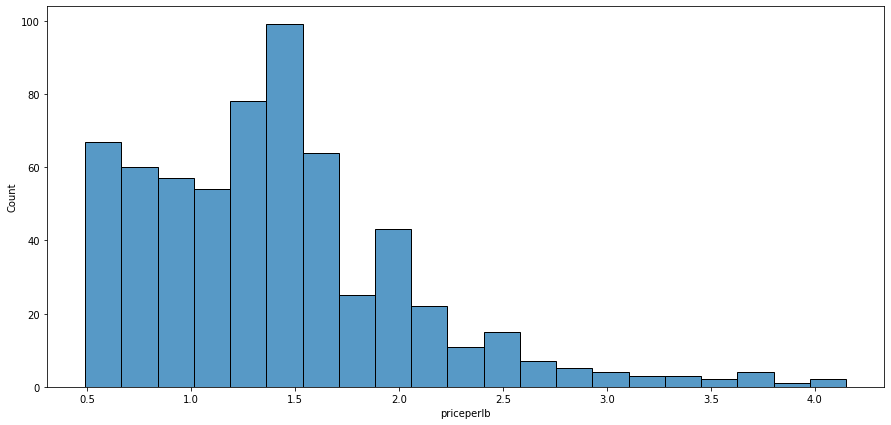

In [22]:
#Plot the spread of average price of a pound of honey
plt.figure(figsize=(15, 7))
sns.histplot(honeyprod.priceperlb)
plt.show()


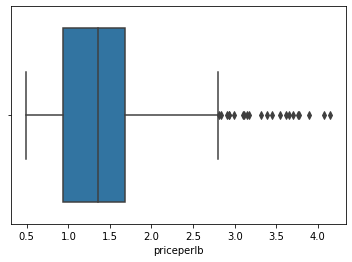

In [23]:
#Plot the Box Plot
sns.boxplot(data = honeyprod, x = 'priceperlb')
plt.show()


Observations:
1. Price per pound of honey has a right skewed distribution with a lot of outliers towards the higher end.
2. The median price per pound of honey is 1.35

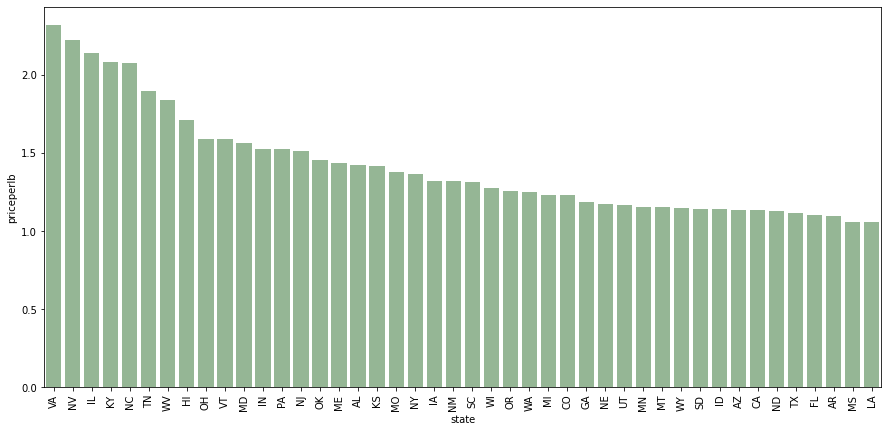

In [24]:
#Plot the average price per pound of honey across states
plt.figure(figsize=(15, 7)) # To resize the plot
sns.barplot(data = honeyprod, x = "state", y = "priceperlb", ci=None, color = "darkseagreen",
            order=honeyprod.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables
plt.show()

Observations:
1. Virginia has the highest price per pound of honey.
2. The average price per pound of honey in the major honey producing states is towards the lower end.


**CONCLUSION:**

1. We can conclude that the total honey production has declined over the years, whereas the value of production per pound has increased.

2. The reason for the declined honey production is the decrease in the yield per colony over the years.

3. The major honey producing states are California, Florida, North and South Dakota, and Montana.

4. Among these, Florida has been very efficient in selling honey.
